# Business Objective

An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.

Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.

## Variable	Description



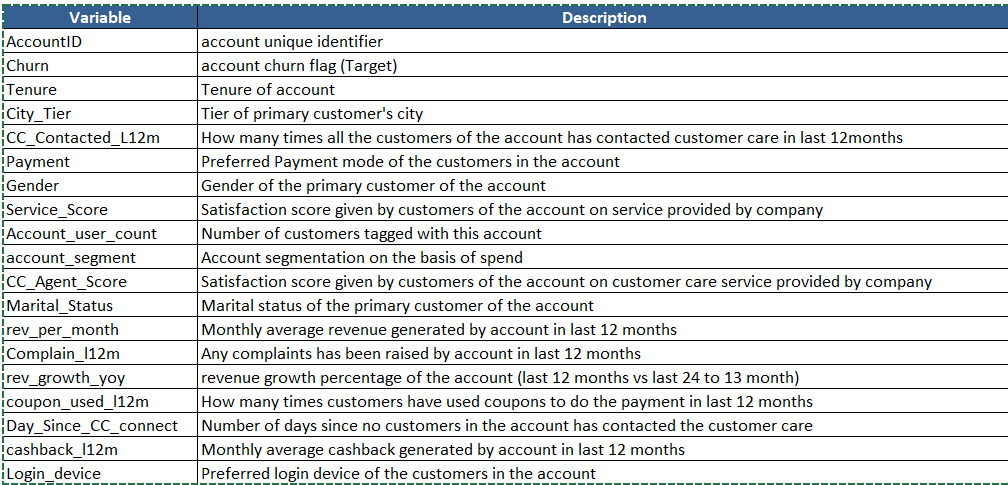

# Python Libraries Used

In [1]:
#INT1  importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the data

In [2]:
df=pd.read_excel('Customer Churn Data.xlsx', sheet_name='Data for DSBA')

## Understanding the data

## Data Dimension (DU1)

In [3]:
df.shape 

(11260, 19)

There are 19 features and 11260 records in the dataset

## Understanding the features and feature types

## Understanding the features and feature types (DU2)

In [4]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

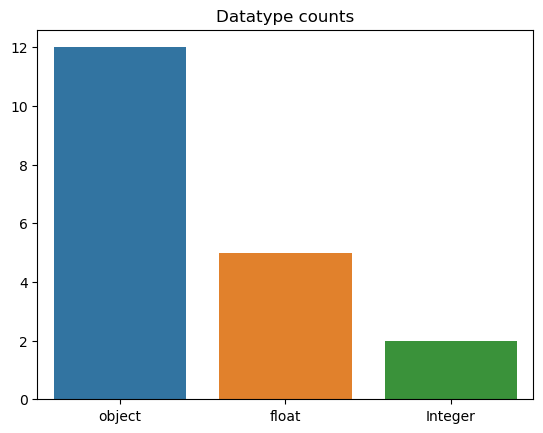

In [5]:
d={'object':0, 'float':0, 'Integer':0}
for i in df.columns:
  if (df[i].dtype =='int64'):
    d['Integer']+=1
  elif (df[i].dtype =='float64'):
     d['float']+=1
  else:
    d['object']+=1

keys = list(d.keys())
values = list(d.values())
sns.barplot(x=keys, y=values).set(title='Datatype counts')
plt.show()# Show the plot

As per the basic analysis there are 12 catagorical fields and 11 numerical fields. out of 11 numerical fields there are 2 integer and 5 decimal columns. 
While checking the non-null value counts, It is not matching with the total record count this represents presence of null values in some features.


## A glance of the data (DU3)

In [6]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


While comparing the data against the data type, some numerical filed such Tenure, Account_user_count, Revenue per month, rev_growth_yoy, coupon_used_for_payment, Day since conect and cashback are fetched as object. It represents the presence of non-numerical values in the numerical fields. Lets furhter drill down the data by filtering it by unique value.

## To identify the unique values in the dataset (DU4)

In [7]:
for col, ro in df.items():           # iterate each columns and rows through the dataset get the column label and row values
  print("Feature Name :", col, "         Data Type :", df[col].dtype, "\n")        # print column lable, its datatype and a new line
  print(df[col].unique(), "\n")          # print unique values
  print("__________________________________________________________________________")

Feature Name : AccountID          Data Type : int64 

[20000 20001 20002 ... 31257 31258 31259] 

__________________________________________________________________________
Feature Name : Churn          Data Type : int64 

[1 0] 

__________________________________________________________________________
Feature Name : Tenure          Data Type : object 

[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61] 

__________________________________________________________________________
Feature Name : City_Tier          Data Type : float64 

[ 3.  1. nan  2.] 

__________________________________________________________________________
Feature Name : CC_Contacted_LY          Data Type : float64 

[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.] 

________

The above code iterate through each feature in the dataset and fetch its unique values and print the same along with its name and data type. While looking at the output, there are some invalid characters such as #, @, *, $ and & present in some features.Also found some inconsistancy in the data in some features such as Gender and Account segments. Gender has been tracked as Female, F, Male, M. Similary, account_segment Regular Plus, Regular +, Super Plus and Super + . These irrgularities need to be corrected in the Feature Engineering section.

## Missing value identification (DU5)

In [8]:
df.isnull().any() #returns if there is any null values in each feature

AccountID                  False
Churn                      False
Tenure                      True
City_Tier                   True
CC_Contacted_LY             True
Payment                     True
Gender                      True
Service_Score               True
Account_user_count          True
account_segment             True
CC_Agent_Score              True
Marital_Status              True
rev_per_month               True
Complain_ly                 True
rev_growth_yoy             False
coupon_used_for_payment    False
Day_Since_CC_connect        True
cashback                    True
Login_device                True
dtype: bool

There are null values almost all the fields except AccountID, Churn, rev_growth_yoy and coupon_used_for_payment

In [9]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

## Percentage of Missing Values

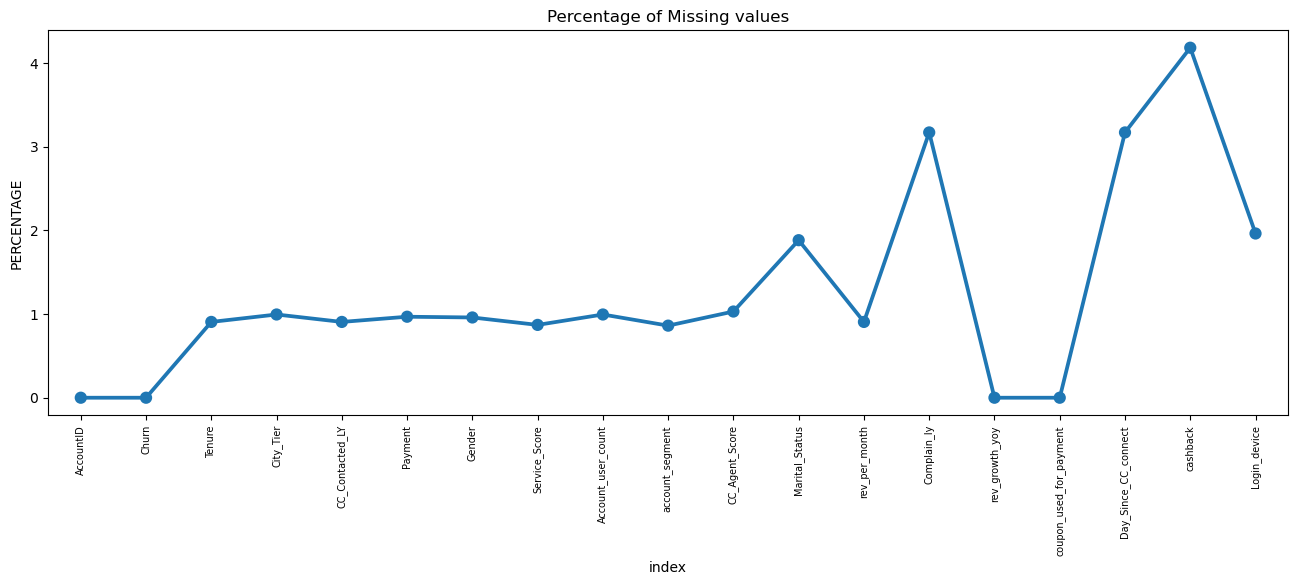

In [10]:
# missing value percenage ploting
missing = pd.DataFrame((df.isnull().sum() * 100 / df.shape[0]).reset_index())
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Duplicate value check (DU7)

In [11]:
df[df.duplicated()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [12]:
df.duplicated().sum()

0

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


The function Dataframe.duplicated() returned only the column headers. It means there are no duplicate rows\values in the dataset

## Data understanding Summary (DU8)

There are 19 columns/Features 11260 records in the dataset

The presence of invalid characters in numerical fields makes the numerical data type to object data types.

There are presence of null values in most of the fields.

There are no duplicate rows in the dataset

## Feature Engineering

Feature engineering includes Feature Removal, Data Cleaning, Null value treatment and Outlier Detection/Removal

## Feature Removal (FE1)

In [14]:
# Feature removal
print("Column counts before removal:", len(df.columns))
df.drop("AccountID", inplace=True, axis= 1)
print("Column counts after removal:", len(df.columns))

Column counts before removal: 19
Column counts after removal: 18


In [15]:
df.shape

(11260, 18)

AccountID is a unique identification number given for each rows. It doesn't add value, so the AccountId field is removed. After removing the AccountID, we have 18 features.

##  Data Cleaning (FE2)

While analysing the data, there were the presence of invalid characters and inconsistancies in the dataset . The below codes will remove all the invalid characters from the dataset

In [16]:
# Cleaning special characters
df.replace(to_replace=['*','&', '$', '+', '@','#'], value=np.NaN, inplace=True)
df.replace(to_replace='&&&&', value='others', inplace=True)

# Correcting the inconsistent data
df['Gender'].replace(to_replace='Female', value='F', inplace=True)
df['Gender'].replace(to_replace='Male', value='M', inplace=True)
df['account_segment'].replace(to_replace='Regular +', value='Regular Plus', inplace=True)
df['account_segment'].replace(to_replace='Super +', value='Super Plus', inplace=True)

In [17]:
# To identify the unique values in the dataset
for col, ro in df.items():           # iterate each columns and rows through the dataset get the column label and row values
  print("Feature Name :", col, "         Data Type :", df[col].dtype, "\n")        # print column lable, its datatype and a new line
  print(df[col].unique(), "\n")          # print unique values
  print("__________________________________________________________________________")

df.info()

Feature Name : Churn          Data Type : int64 

[1 0] 

__________________________________________________________________________
Feature Name : Tenure          Data Type : float64 

[ 4.  0.  2. 13. 11. nan  9. 99. 19. 20. 14.  8. 26. 18.  5. 30.  7.  1.
 23.  3. 29.  6. 28. 24. 25. 16. 10. 15. 22. 27. 12. 21. 17. 50. 60. 31.
 51. 61.] 

__________________________________________________________________________
Feature Name : City_Tier          Data Type : float64 

[ 3.  1. nan  2.] 

__________________________________________________________________________
Feature Name : CC_Contacted_LY          Data Type : float64 

[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.] 

__________________________________________________________________________
Feature Name : Payment          Data Type : object 

['Debit 

##  Feature name correction (FE3)

For the purpose of clarity in the Feature names few labels are renamed for better understanding as below

In [18]:
column_mapping = {
    'CC_Contacted_LY': 'Contacted_CC_in_lst_12M',
    'Service_Score': 'Service_Rating',
    'CC_Agent_Score' : 'Customer_CC_Rating',
    'rev_per_month' : 'Avg_Revenue_per_Mnth',
    'Complain_ly' : 'Complaint_recd_L_Yr',
    'rev_growth_yoy' : 'Percent_Annual_rev_growth'
    }
df=df.rename(columns=column_mapping)
print(df.columns)
df.info()

Index(['Churn', 'Tenure', 'City_Tier', 'Contacted_CC_in_lst_12M', 'Payment',
       'Gender', 'Service_Rating', 'Account_user_count', 'account_segment',
       'Customer_CC_Rating', 'Marital_Status', 'Avg_Revenue_per_Mnth',
       'Complaint_recd_L_Yr', 'Percent_Annual_rev_growth',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Login_device'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      11260 non-null  int64  
 1   Tenure                     11042 non-null  float64
 2   City_Tier                  11148 non-null  float64
 3   Contacted_CC_in_lst_12M    11158 non-null  float64
 4   Payment                    11151 non-null  object 
 5   Gender                     11152 non-null  object 
 6   Service_Rating             11162 non-nu

The below code with create lists of categorical (cat_fld) and numerical fields (num_fld) for target operations

In [19]:
cat_fld=[]
num_fld=[]
for col_s in df.columns:
  if (df[col_s].dtype =='O'):
    cat_fld.append(col_s)
  else:
    num_fld.append(col_s)

# Eventhough some features are numerical dataype but they are categorical
num_fld.remove('City_Tier')
num_fld.remove('Service_Rating')
num_fld.remove('Account_user_count')
num_fld.remove('Customer_CC_Rating')
num_fld.remove('Complaint_recd_L_Yr')
num_fld.remove('Churn')

cat_fld.append('City_Tier')
cat_fld.append('Service_Rating')
cat_fld.append('Account_user_count')
cat_fld.append('Customer_CC_Rating')
cat_fld.append('Complaint_recd_L_Yr')
cat_fld.append('Churn')


print("Categorical fields:")
print("------------------")
for i in cat_fld:
  print(i)

print("\n Numerical fields:")
print("------------------")
for i in num_fld:
  print(i)

Categorical fields:
------------------
Payment
Gender
account_segment
Marital_Status
Login_device
City_Tier
Service_Rating
Account_user_count
Customer_CC_Rating
Complaint_recd_L_Yr
Churn

 Numerical fields:
------------------
Tenure
Contacted_CC_in_lst_12M
Avg_Revenue_per_Mnth
Percent_Annual_rev_growth
coupon_used_for_payment
Day_Since_CC_connect
cashback


## Missing value treatment (FE4)

In [20]:
# missing value treatment for categorical field
for itms in cat_fld:
  df[itms].fillna(df[itms].mode()[0], inplace = True)

# missing value treatment for numerical field
for itms in num_fld:
  df[itms].fillna(round(df[itms].mean(),0), inplace = True)


print("Categorical fields")
print("___________________")
print(df[cat_fld].isna().sum())
print(" ")
print("Numerical fields")
print("___________________")
print(df[num_fld].isna().sum())

Categorical fields
___________________
Payment                0
Gender                 0
account_segment        0
Marital_Status         0
Login_device           0
City_Tier              0
Service_Rating         0
Account_user_count     0
Customer_CC_Rating     0
Complaint_recd_L_Yr    0
Churn                  0
dtype: int64
 
Numerical fields
___________________
Tenure                       0
Contacted_CC_in_lst_12M      0
Avg_Revenue_per_Mnth         0
Percent_Annual_rev_growth    0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
dtype: int64


## Outlier detection and removal. (FE5)

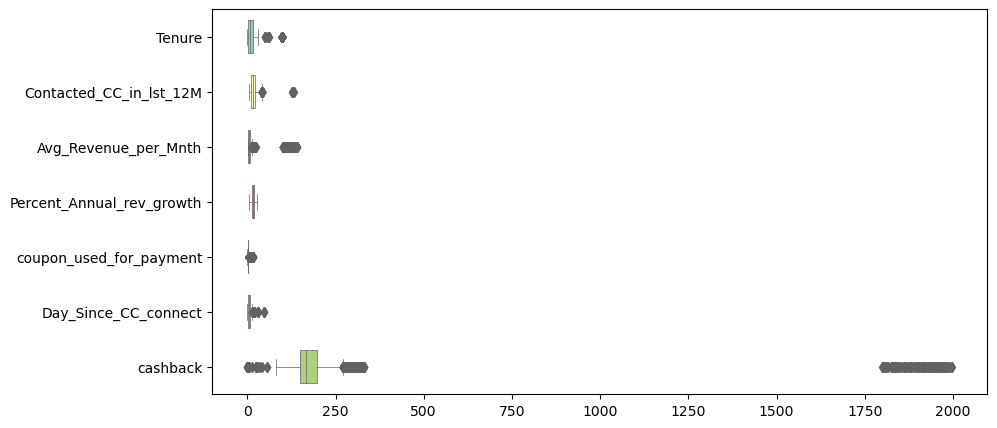

In [21]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df[num_fld],width=0.6,palette="Set3",orient='h',linewidth=0.5)

## Outlier detection and removal. (FE6)

In [22]:
def get_limits(col):         #Function to get upper limit and lower limit of 5 number summary
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    l_lmt= Q1-(1.5 * IQR)
    u_lmt= Q3+(1.5 * IQR)
    return u_lmt, l_lmt

#Outlier Treatment for the numeric columns
for itm in num_fld:
  ul,ll=get_limits(df[itm])
  df[itm]=np.where(df[itm]<ll,ll,df[itm])
  df[itm]=np.where(df[itm]>ul, ul,df[itm])

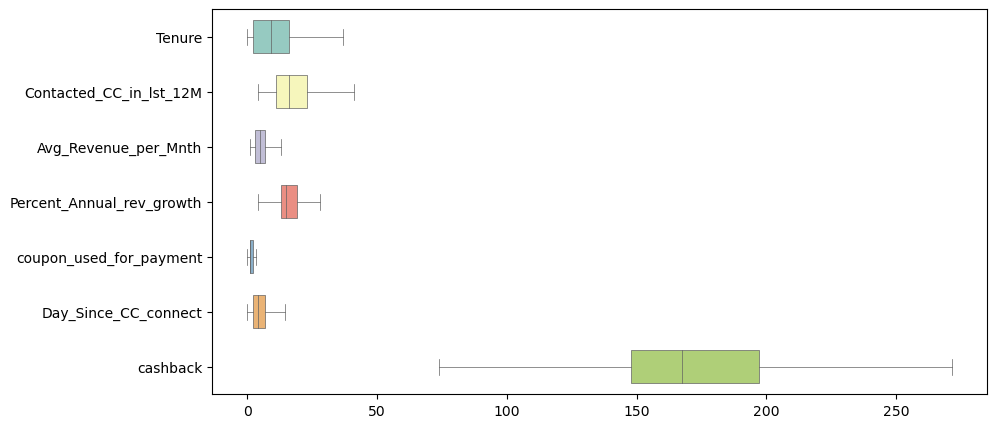

In [23]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df[num_fld],width=0.6,palette="Set3",orient='h',linewidth=0.5)

Now the data is cleaned, removed inconsistancies and outliers. The data is now ready to go ahead with EDA

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.00,0.00,0.00,0.00,1.00
Tenure,11260.0,10.290142,8.887725,0.00,2.00,9.00,16.00,37.00
City_Tier,11260.0,1.647425,0.912763,1.00,1.00,1.00,3.00,3.00
Contacted_CC_in_lst_12M,11260.0,17.833126,8.562396,4.00,11.00,16.00,23.00,41.00
Service_Rating,11260.0,2.903375,0.722476,0.00,2.00,3.00,3.00,5.00
Account_user_count,11260.0,3.704973,1.004383,1.00,3.00,4.00,4.00,6.00
Customer_CC_Rating,11260.0,3.065808,1.372663,1.00,2.00,3.00,4.00,5.00
Avg_Revenue_per_Mnth,11260.0,5.321048,2.884834,1.00,3.00,5.00,7.00,13.00
Complaint_recd_L_Yr,11260.0,0.276288,0.447181,0.00,0.00,0.00,1.00,1.00
Percent_Annual_rev_growth,11260.0,16.193339,3.757222,4.00,13.00,15.00,19.00,28.00


## Exploratory Data Analysis

## Univariate Analysis (EDA1)

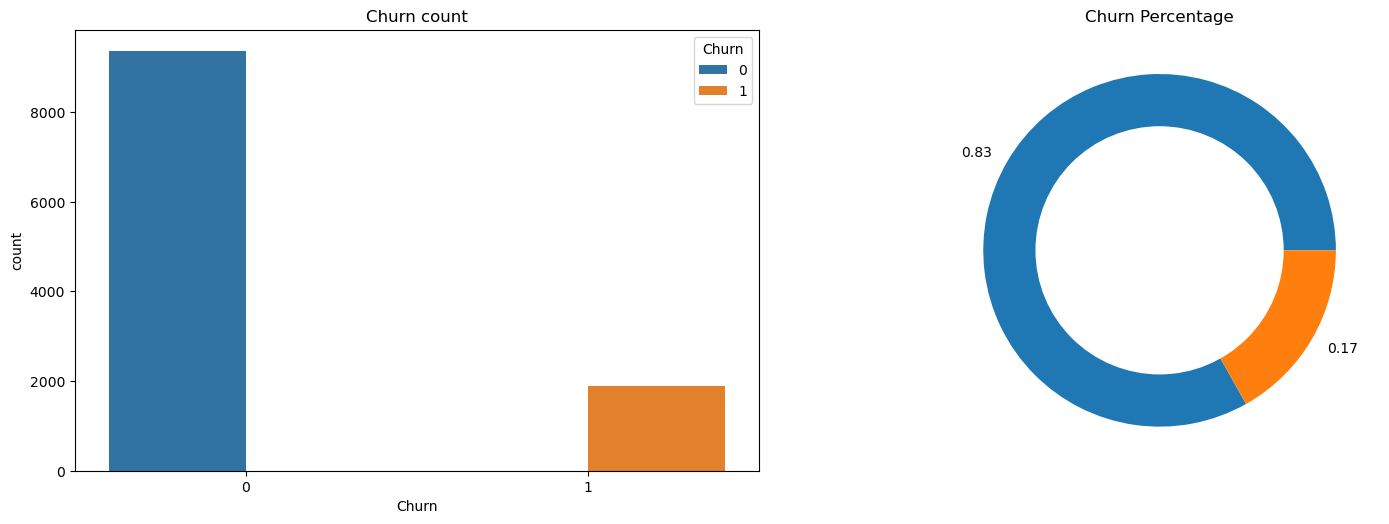

In [25]:
percent=(df.value_counts('Churn').sort_index()/df['Churn'].count()) # calculating the Percentage of cuurn <item count/total>
fig, axs = plt.subplots(1, 2, figsize=(15,5))                       #defining subplot 15" * 5"

fig.tight_layout()                                                 #to auto adjust the padding between plots
axs[0].set_title("Churn count")                                    #setting title for fig 1 (countplot)
sns.countplot(x=df['Churn'], hue=df['Churn'],  ax=axs[0])          #ploting the bar grapht for each item

axs[1].pie(percent, labels=list(round(percent,2)))                 #ploting percentage of each item in pie chart
axs[1].set_title("Churn Percentage")                               #setting title for fig 2 (dougnut plot)
c = plt.Circle( (0,0), 0.7, color='white')                         #adding white circle to overlay pie plot
p=plt.gcf()
p.gca().add_artist(c)
plt.show()

Among all the users (11260) in the company about 17% of the users churned

## Numerical fields (EDA2)

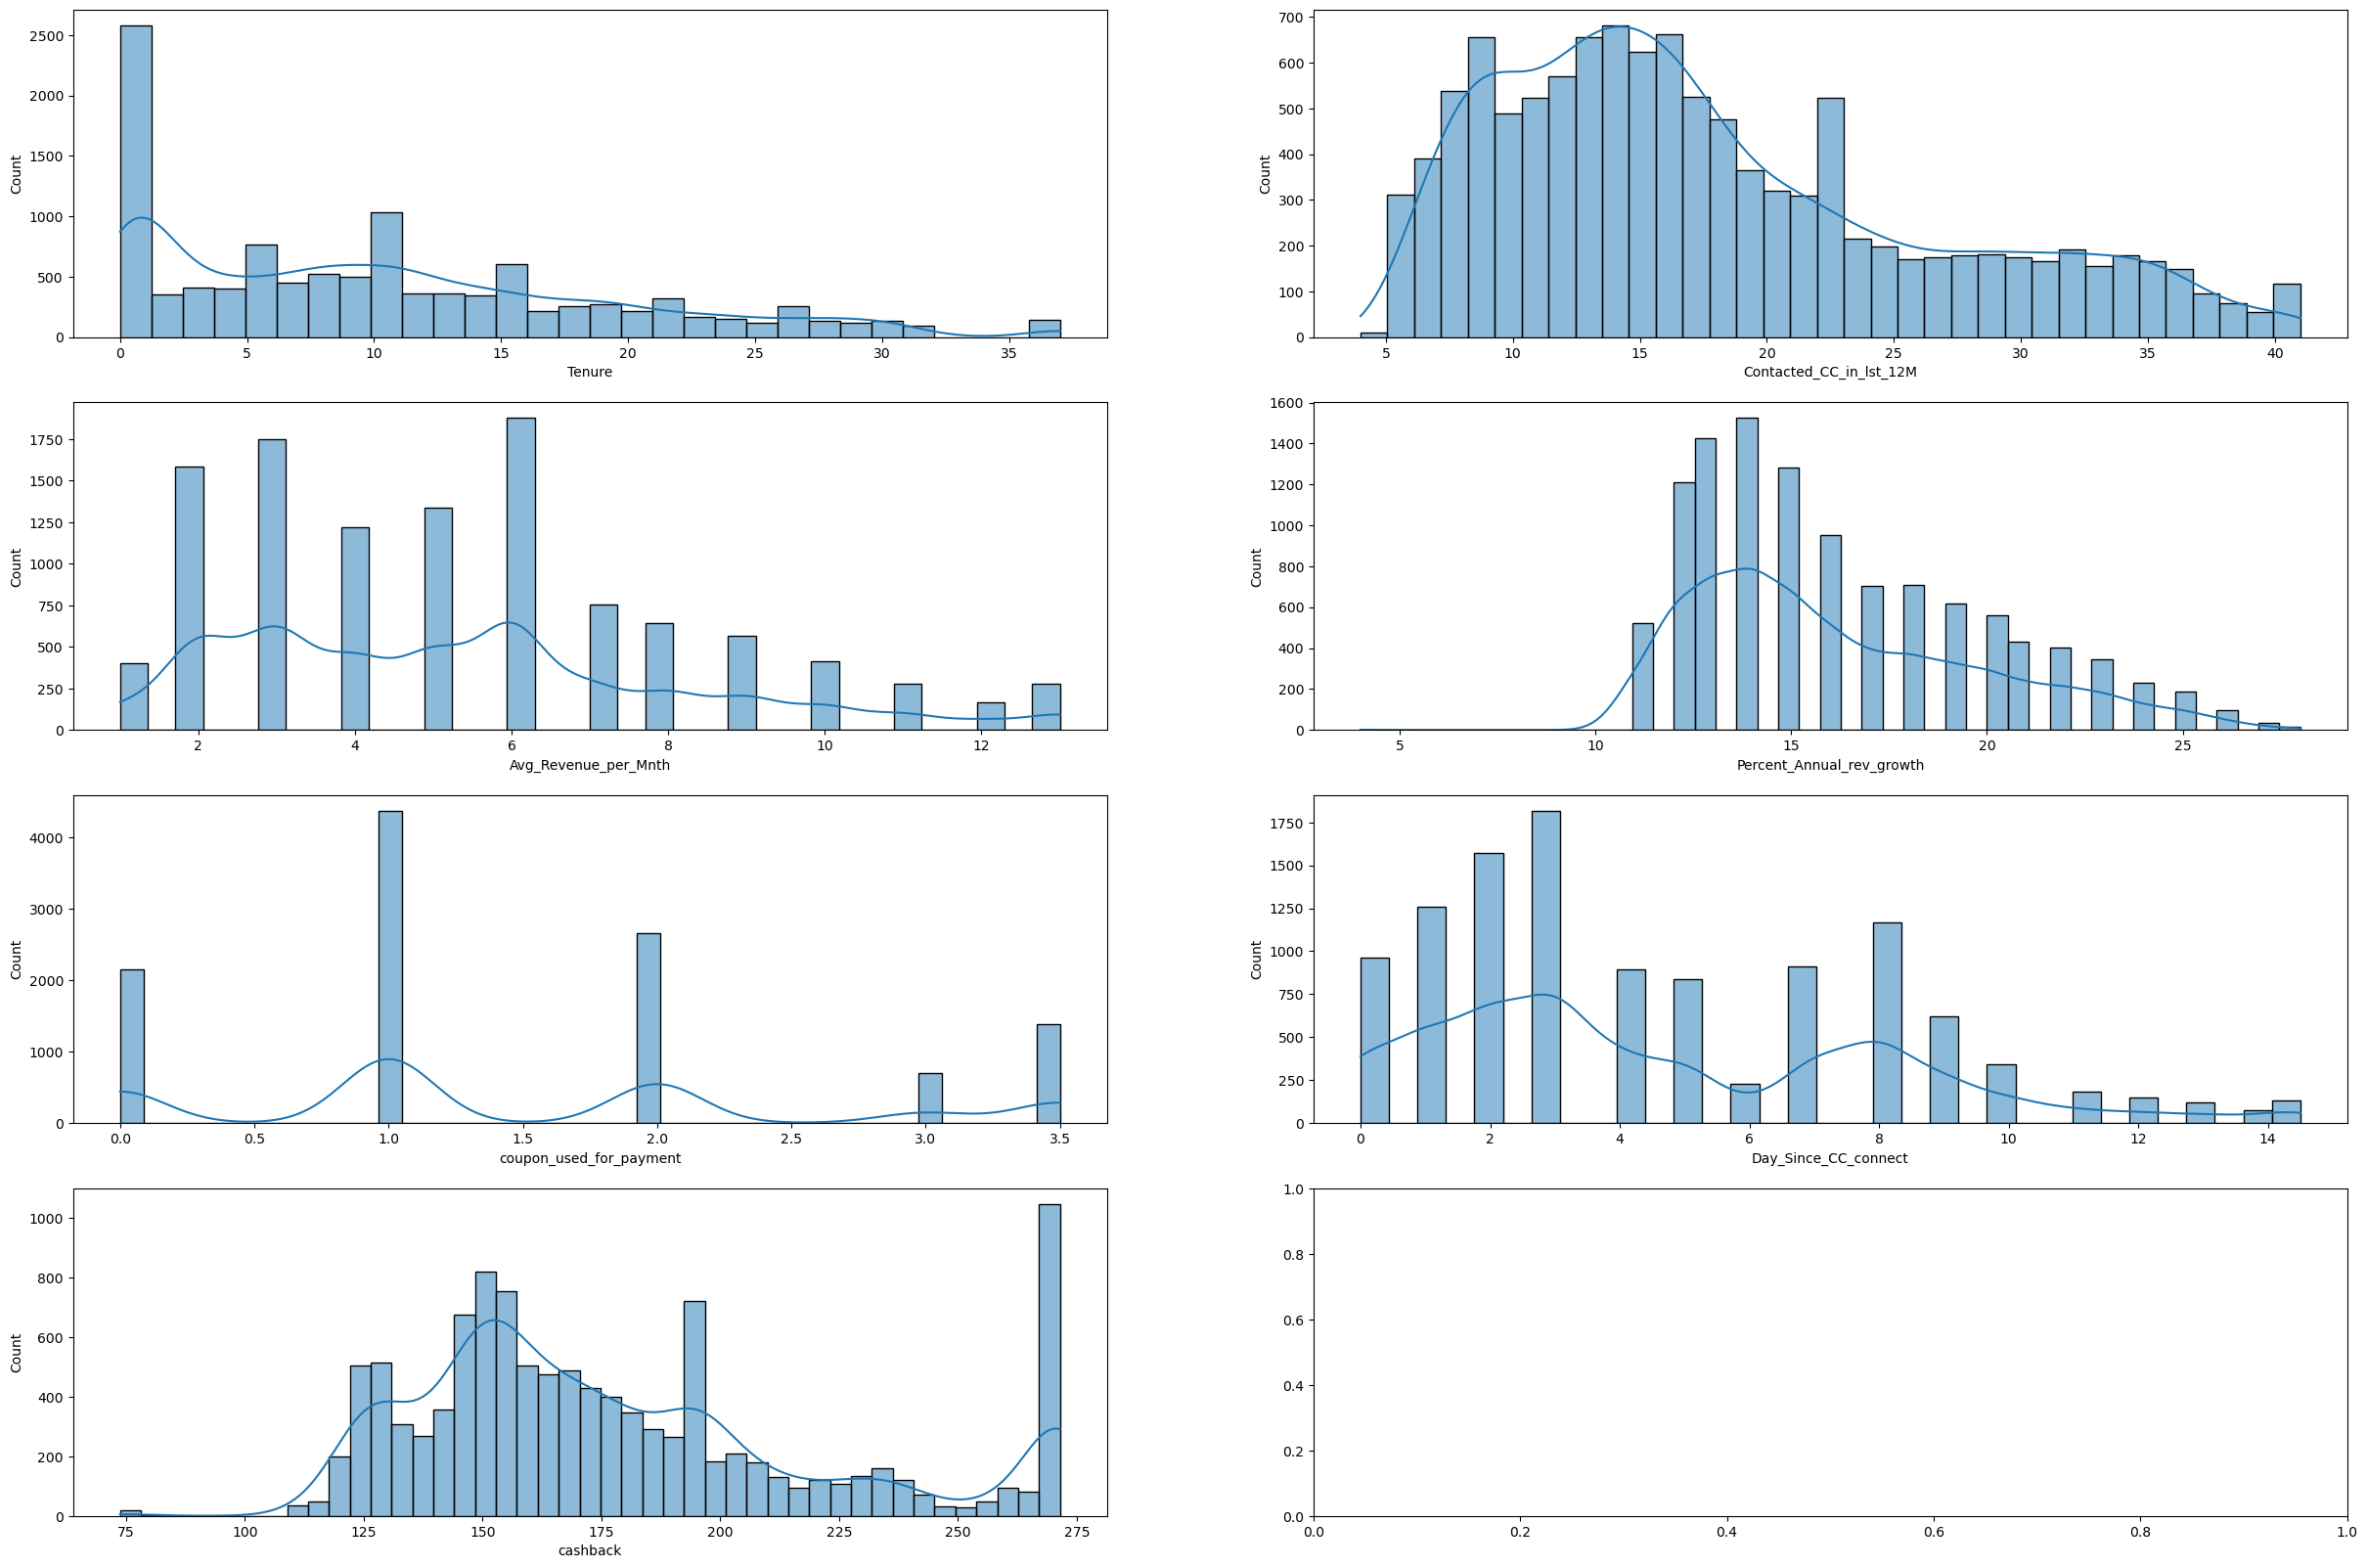

In [26]:
#distribution numerical fields
fig, ax = plt.subplots(4, 2, figsize=(30, 20))                    # defining subplot  4*2
for i, subplot in zip(num_fld, ax.flatten()):                     # iterating through num_flds, subplot axis <ax.flattern convert the 2d array to 1d to iterate>
    sns.histplot(df[i], kde = True, ax=subplot)                   # ploting each histplot in numerical fileds to subplot

From the above bar chart it is observed that:

Majority of Customers have a tenure in the range of 1-20 Months.

Majority of customers contacted the Customer Care about 5-25 times in the last 12 months

Average revenue growth per customer is about 15

Average Cashback obtained by customer is about 150

## Categorical fields (EDA3)

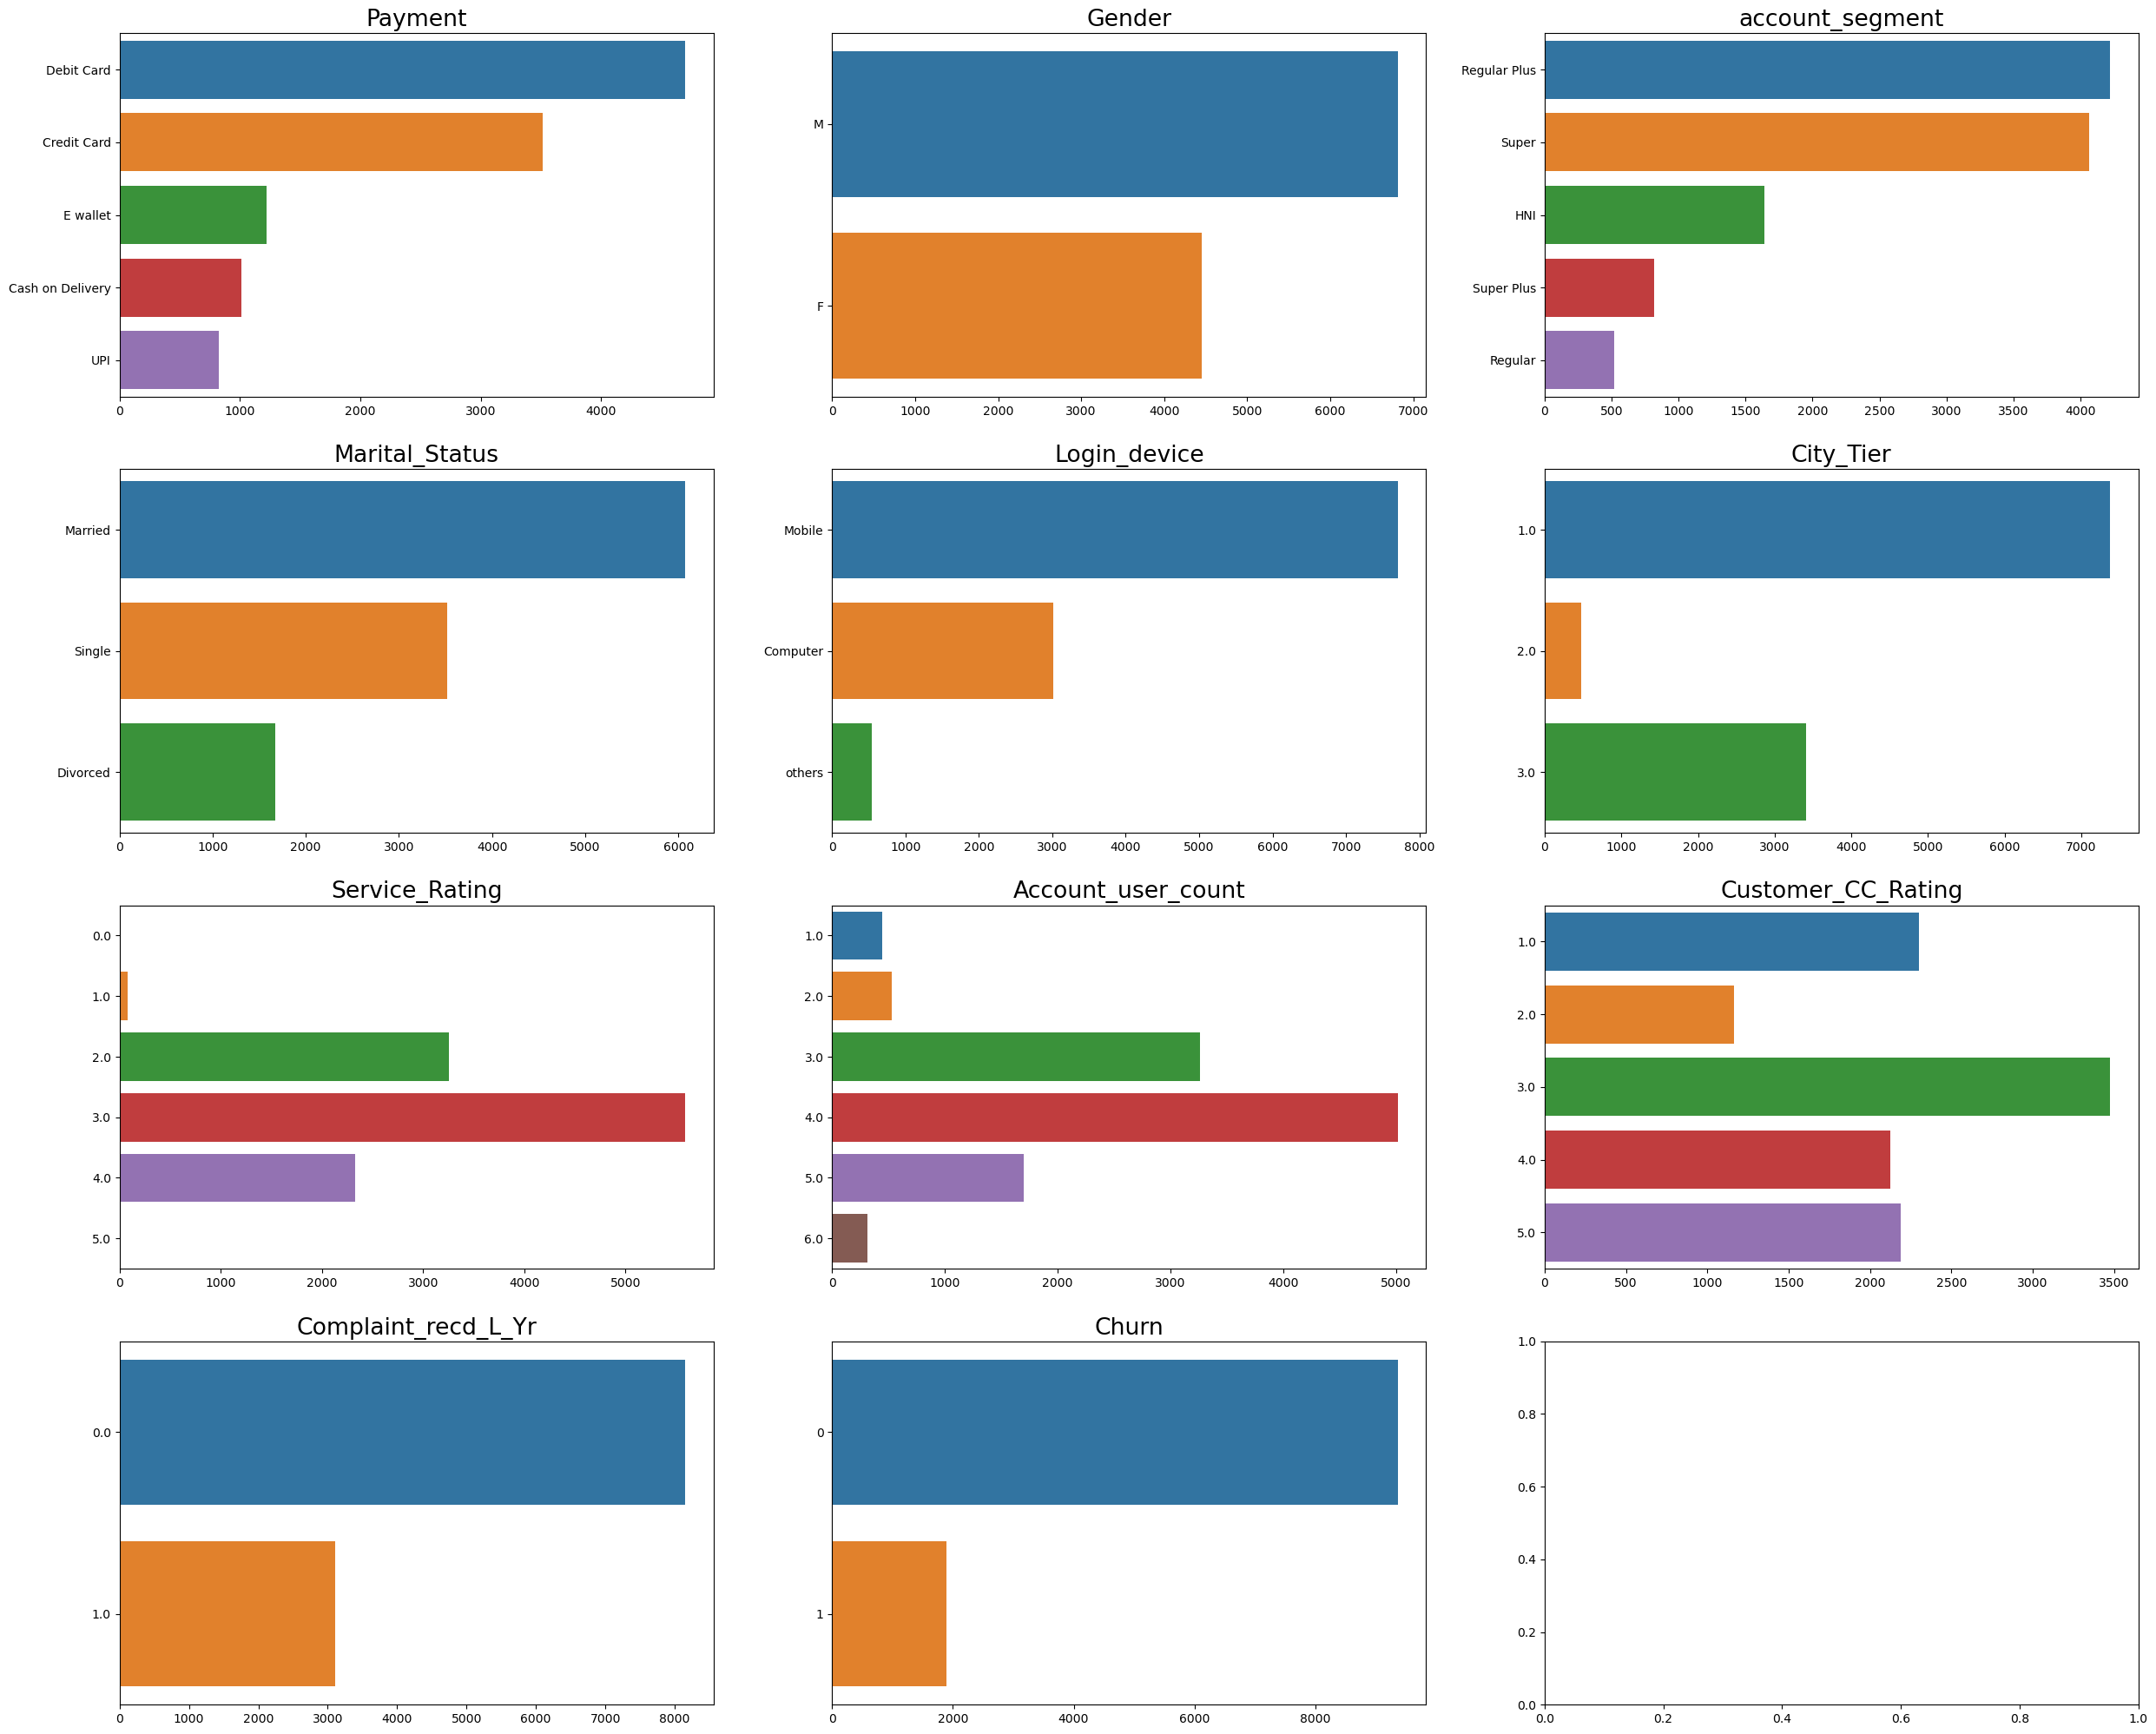

In [27]:
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(30,25))
plt.rcParams['font.size'] = '16'
for col,sub_plt in zip(cat_fld, ax.flatten()):
  sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index,orient="h",  ax=sub_plt).set(title=col)
plt.show()

From the above bar charts it is observed that:

Majority of users are choosing Debit card and Credit Card as their payment mode.

Significatly more no. of Male Users are there when compared to Female Users

Among all the Account segments available most of the Users belong to the "Regular Plus" and "Super"

about 50% of the users are married.

Large portion of the users are using "Mobile" as their login device

About 99% of the users belong to Tire1 and Tire3 Cities

Majority of Users rated the service score as 3/5 which signifies "AVerage"

Majority of Users accounts are being used by 4 members

## Bi-variate analsysis (EDA4)

## Numerical Field Analysis (EDA4)

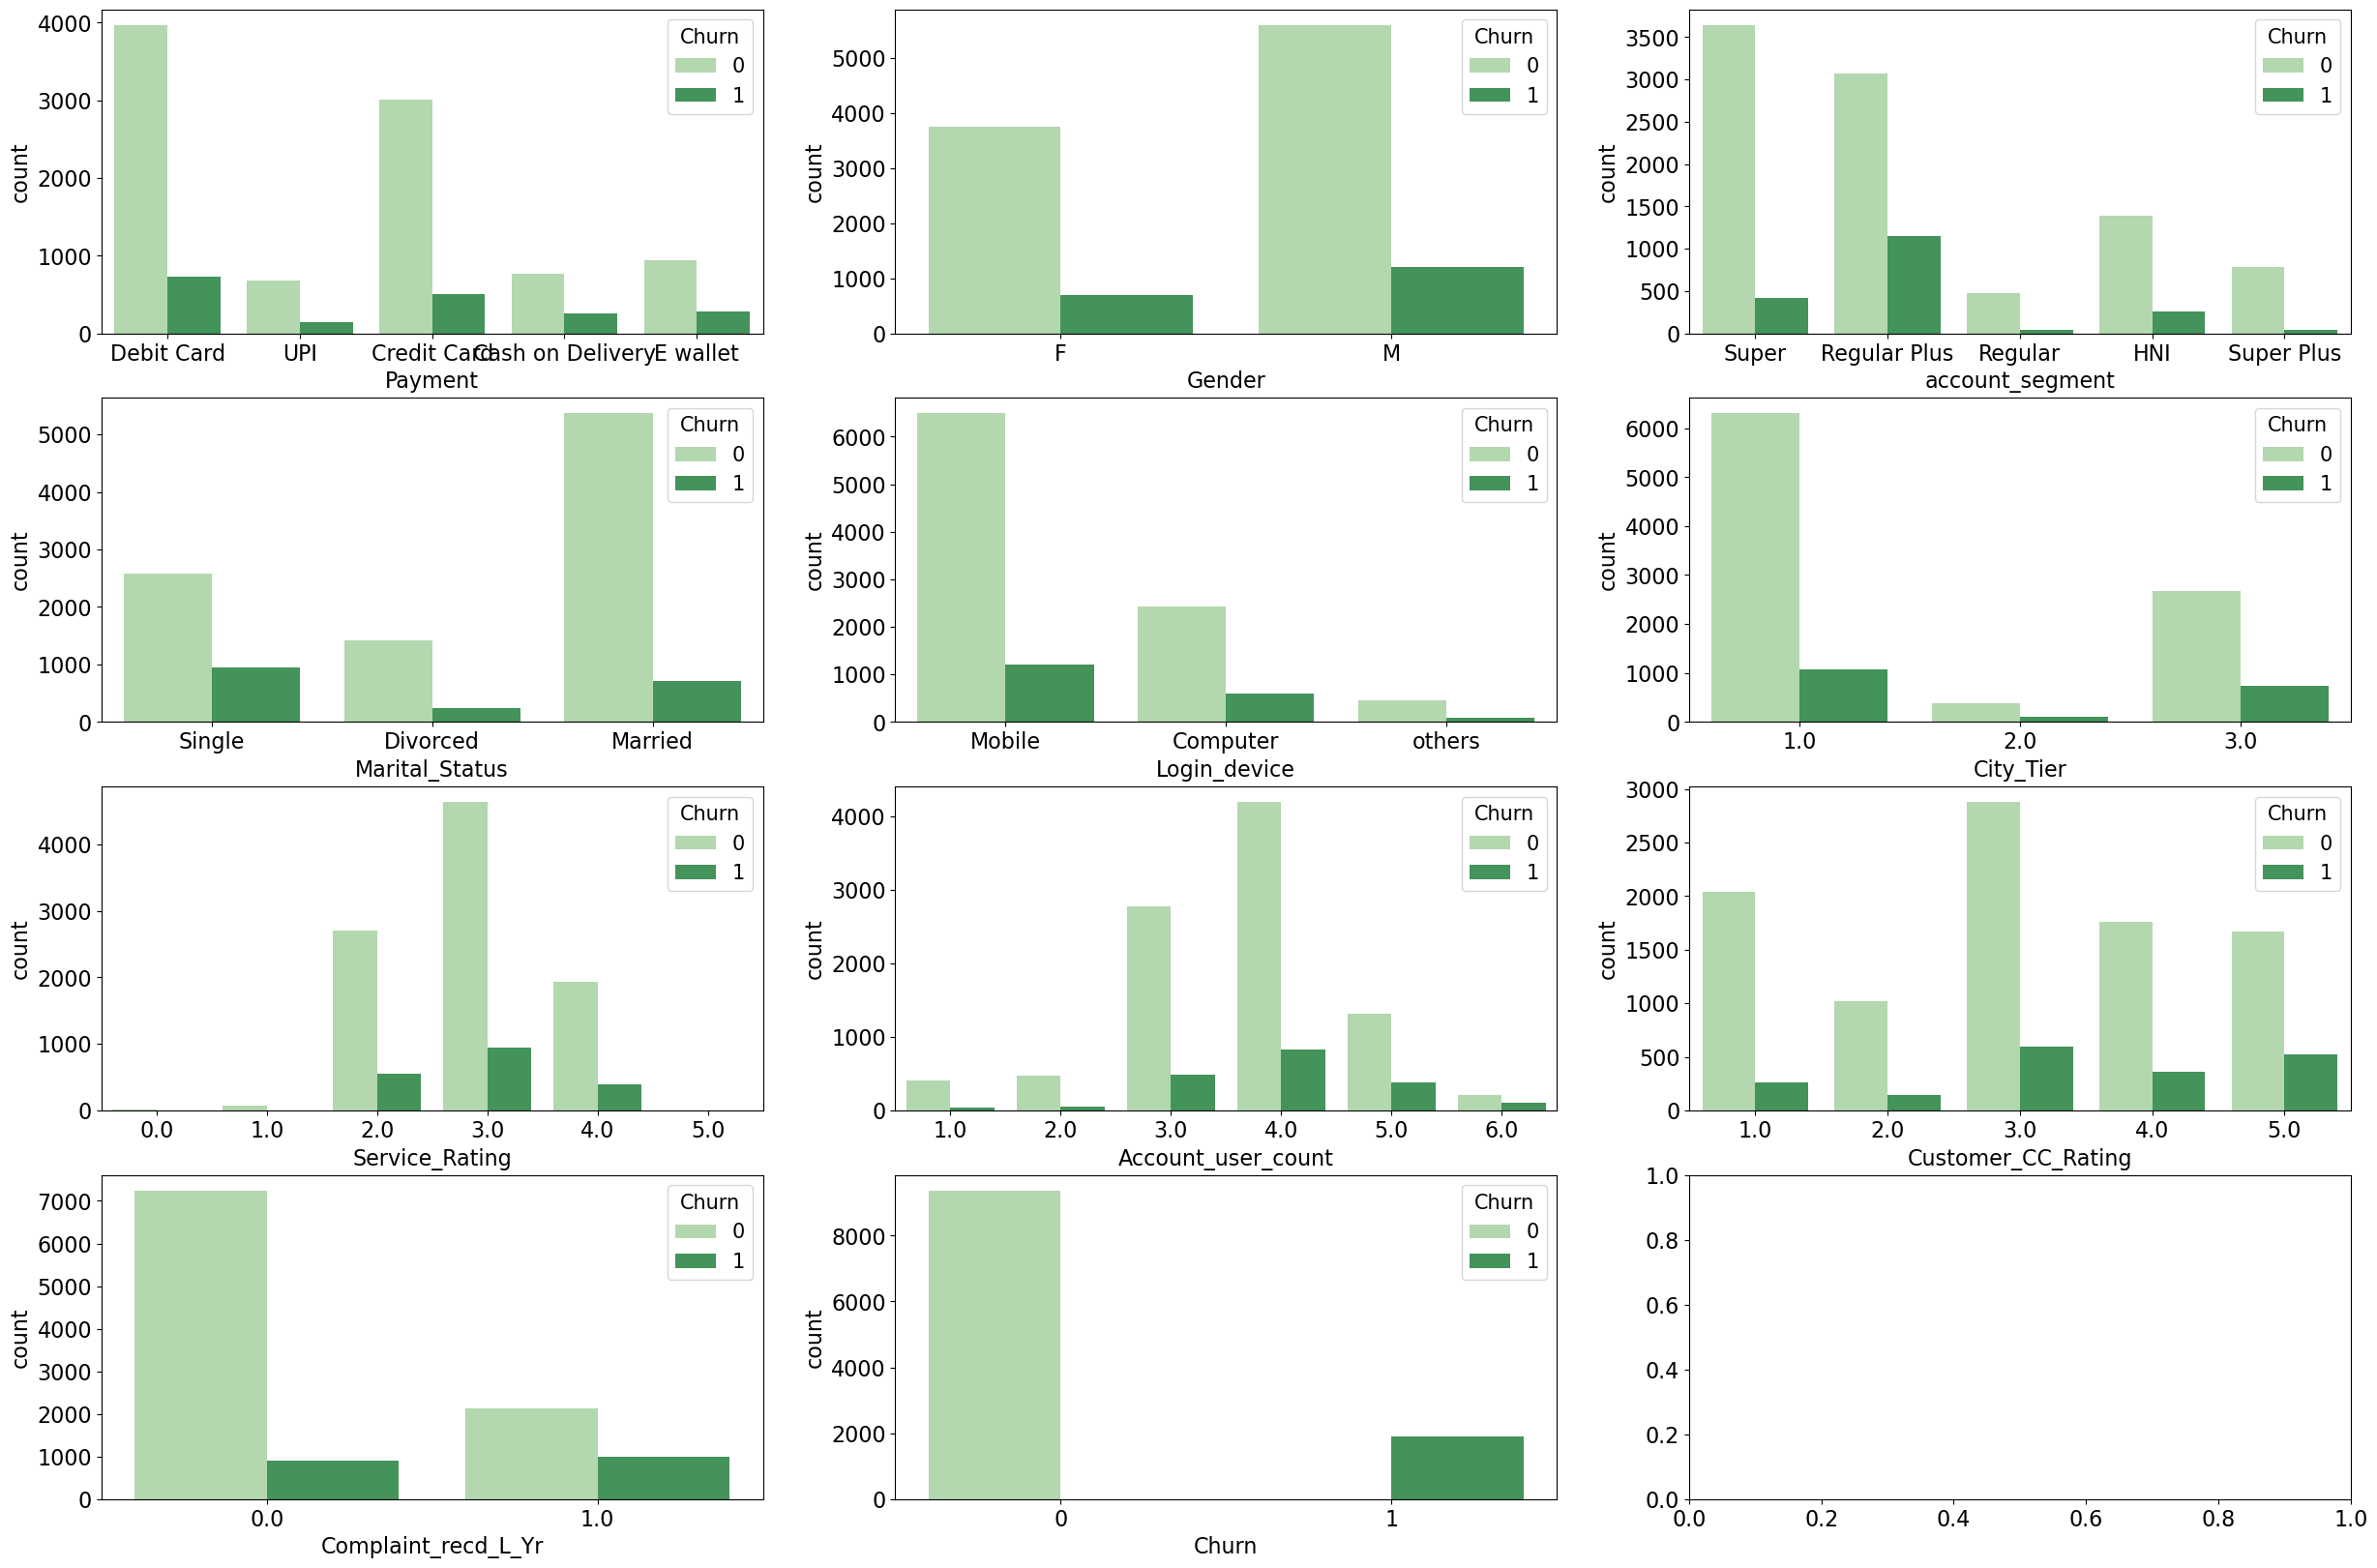

In [28]:
#Churn rate by category
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(30,20))
plt.rcParams['font.size'] = '15'
for col,sub_plt in zip(cat_fld, ax.flatten()):
   sns.countplot(x = df[col],  hue=df.Churn,ax=sub_plt, palette = "Greens")
plt.show()

The above plot shows the details of the Churned users:

Majority of the Churned users belong to the account segment of "Regular Plus" and "Super"

Majority of Churned users used Mobile as their login device

Majority of Churned users have given service score as 3/5

Majority of Churned user accounts has 4 users per account

## Categorical variable (EDA5)

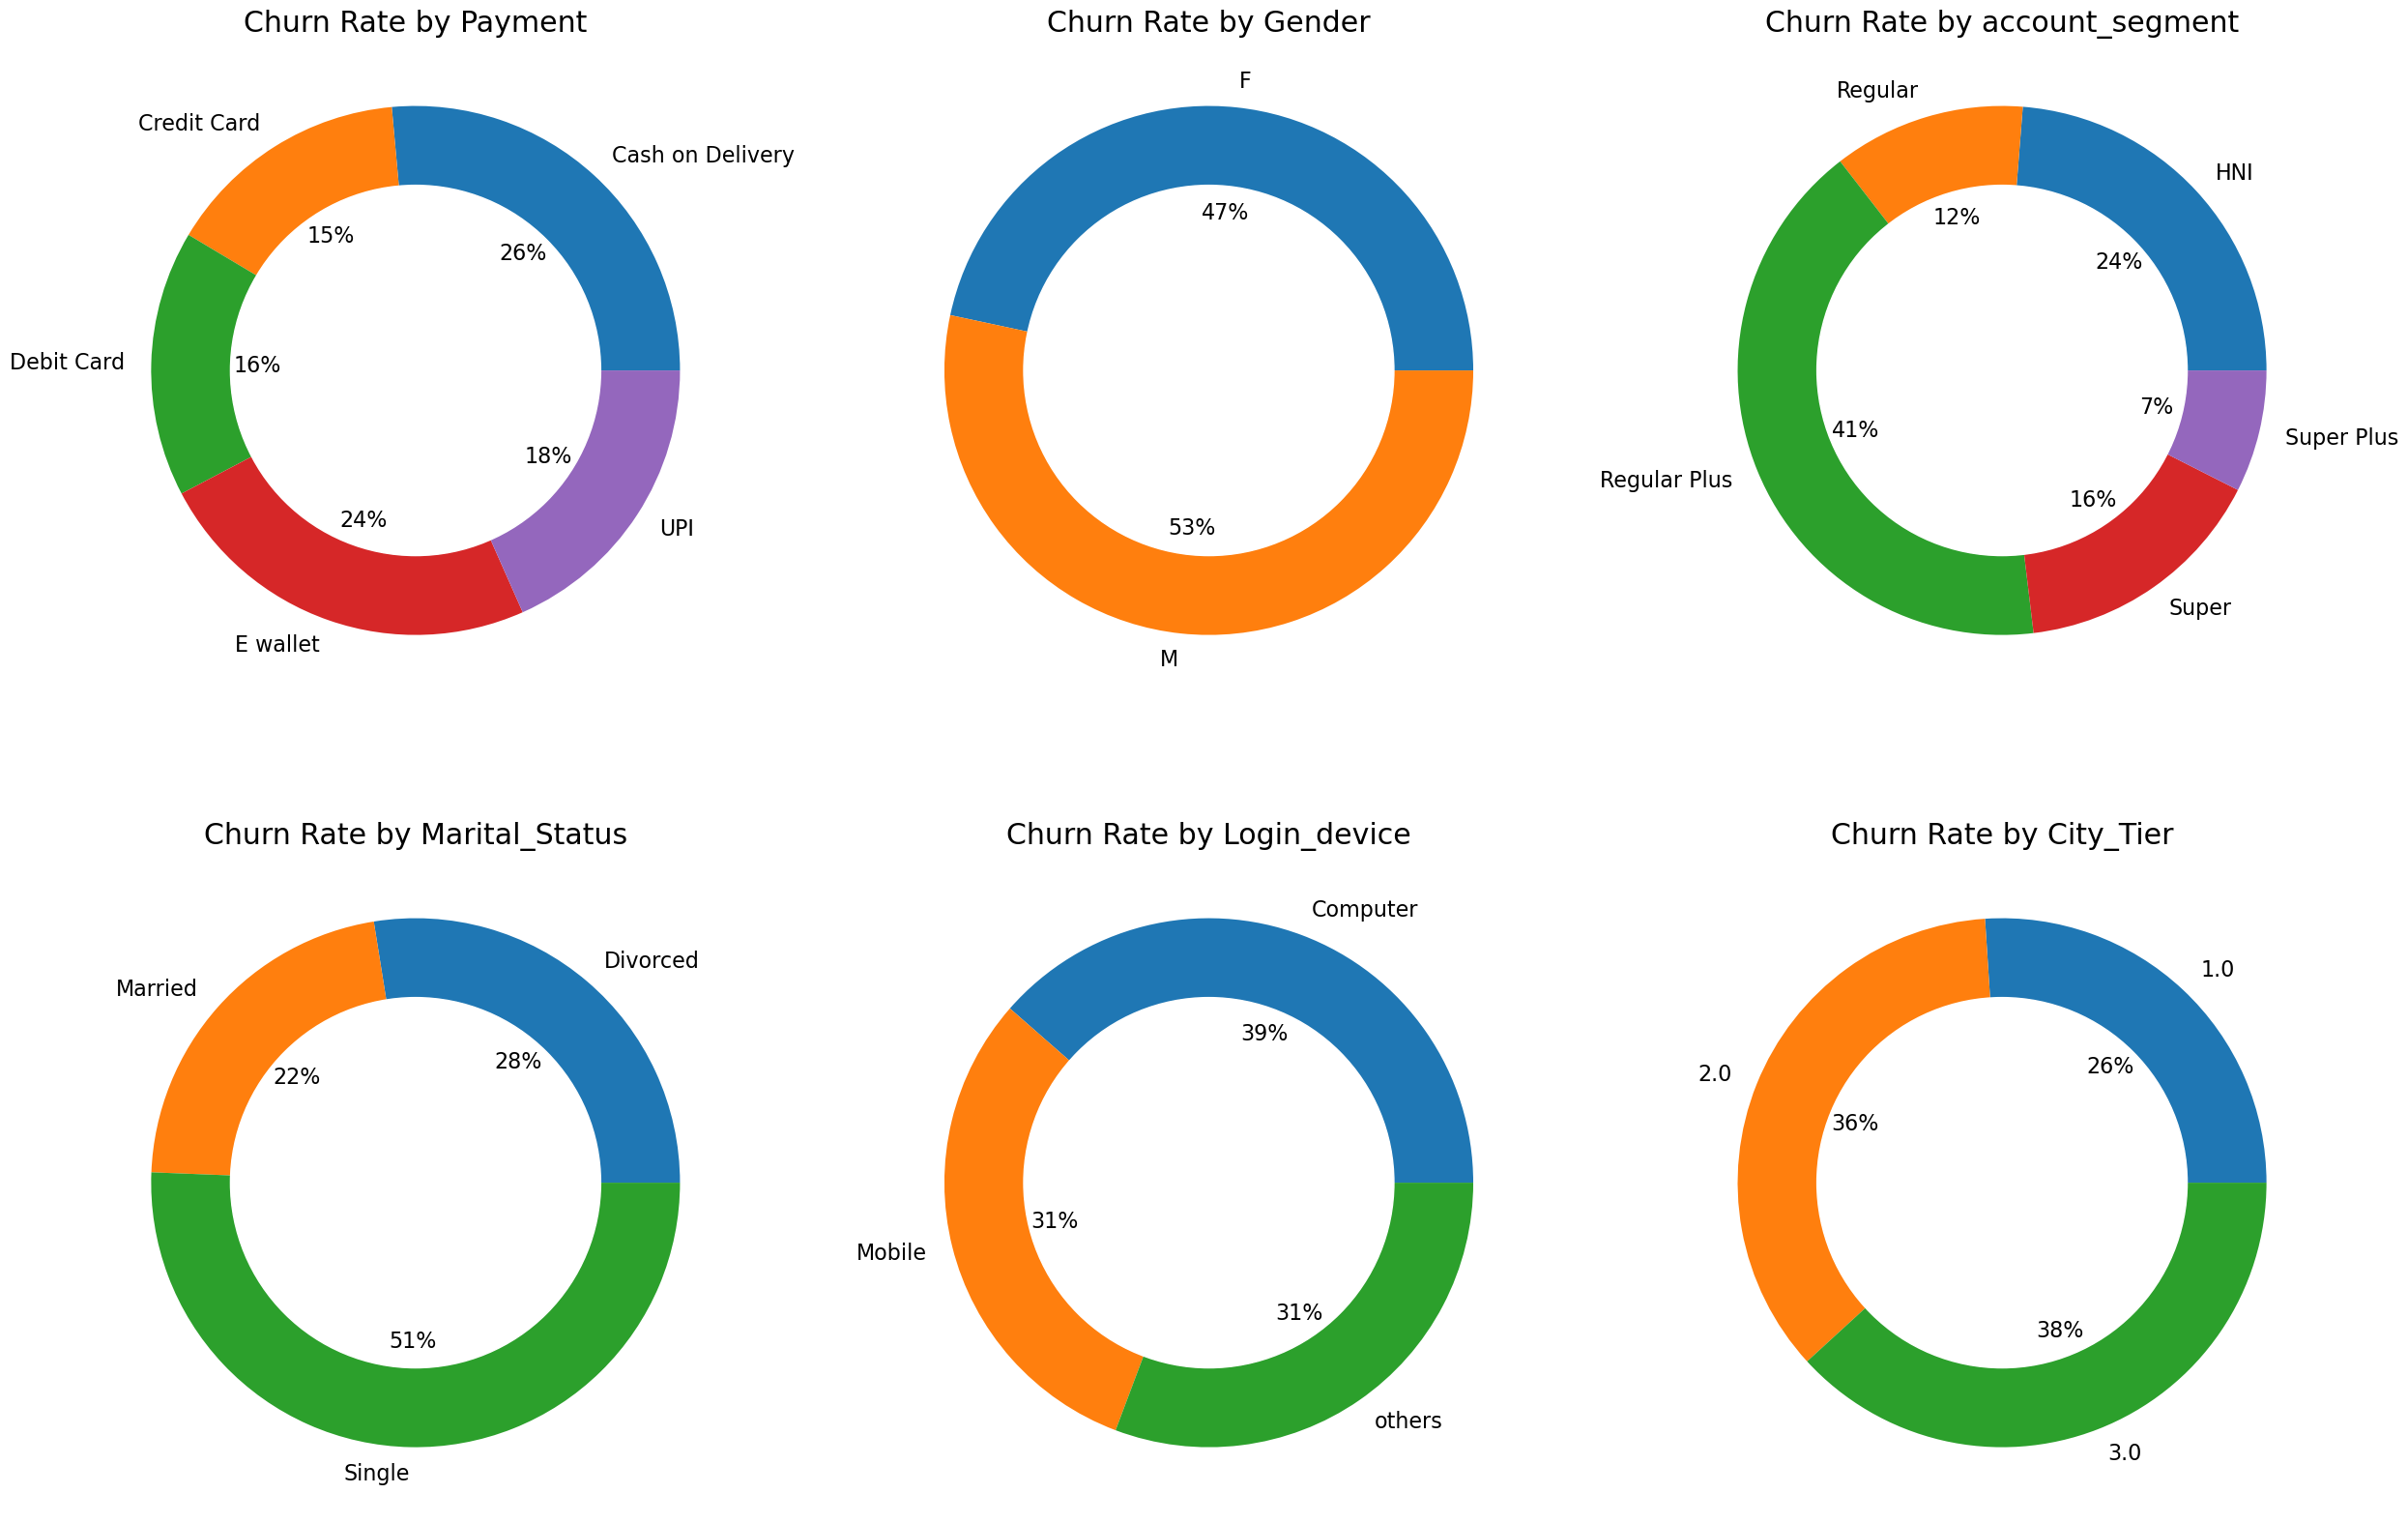

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.rcParams['font.size'] = '18'                            # set the font size to 18
ax[0, 0].set_title("Percentage Churn Rate by Category fields")  # Add title to the first graph

for col, subplot in zip(cat_fld, ax.flatten()):             # loop to iterate over category fields
    sm = df.groupby(by=df[col]).Churn.sum()                 # Calculate percent churn
    tot = df.value_counts(col).sort_index()                 # Calculate total number of customers in each category
    pers = sm/tot*100                                       # Calculate percent churn for each category
    subplot.set_title(f"Churn Rate by {col}")               # Add title to the graph
    wedges, texts, autotexts = subplot.pie(pers.values, labels=pers.index, autopct='%.0f%%', textprops={'fontsize': 16})  # Add pie chart
    center_circle = plt.Circle((0, 0), 0.7, color='white')  # Add a white circle in the center to convert to a doughnut chart
    subplot.add_artist(center_circle)

plt.show()

The above plot represents few observations about the Churned users:

Even though all the payment modes are used by users the maximum users used Cash on Deivery as their payment mode (26%)

Majority belong to account segment "Regular Plus"(41%) and "HNI" (24%)

About 51% has their Marital Status as "Single"

The login devices used by churned users are Computer (56%) and Mobile(44%)

Tire1 City(26%), Tire2 City(36%), Tire3 City(38%)

## Multivariate Analysis (EDA6) 

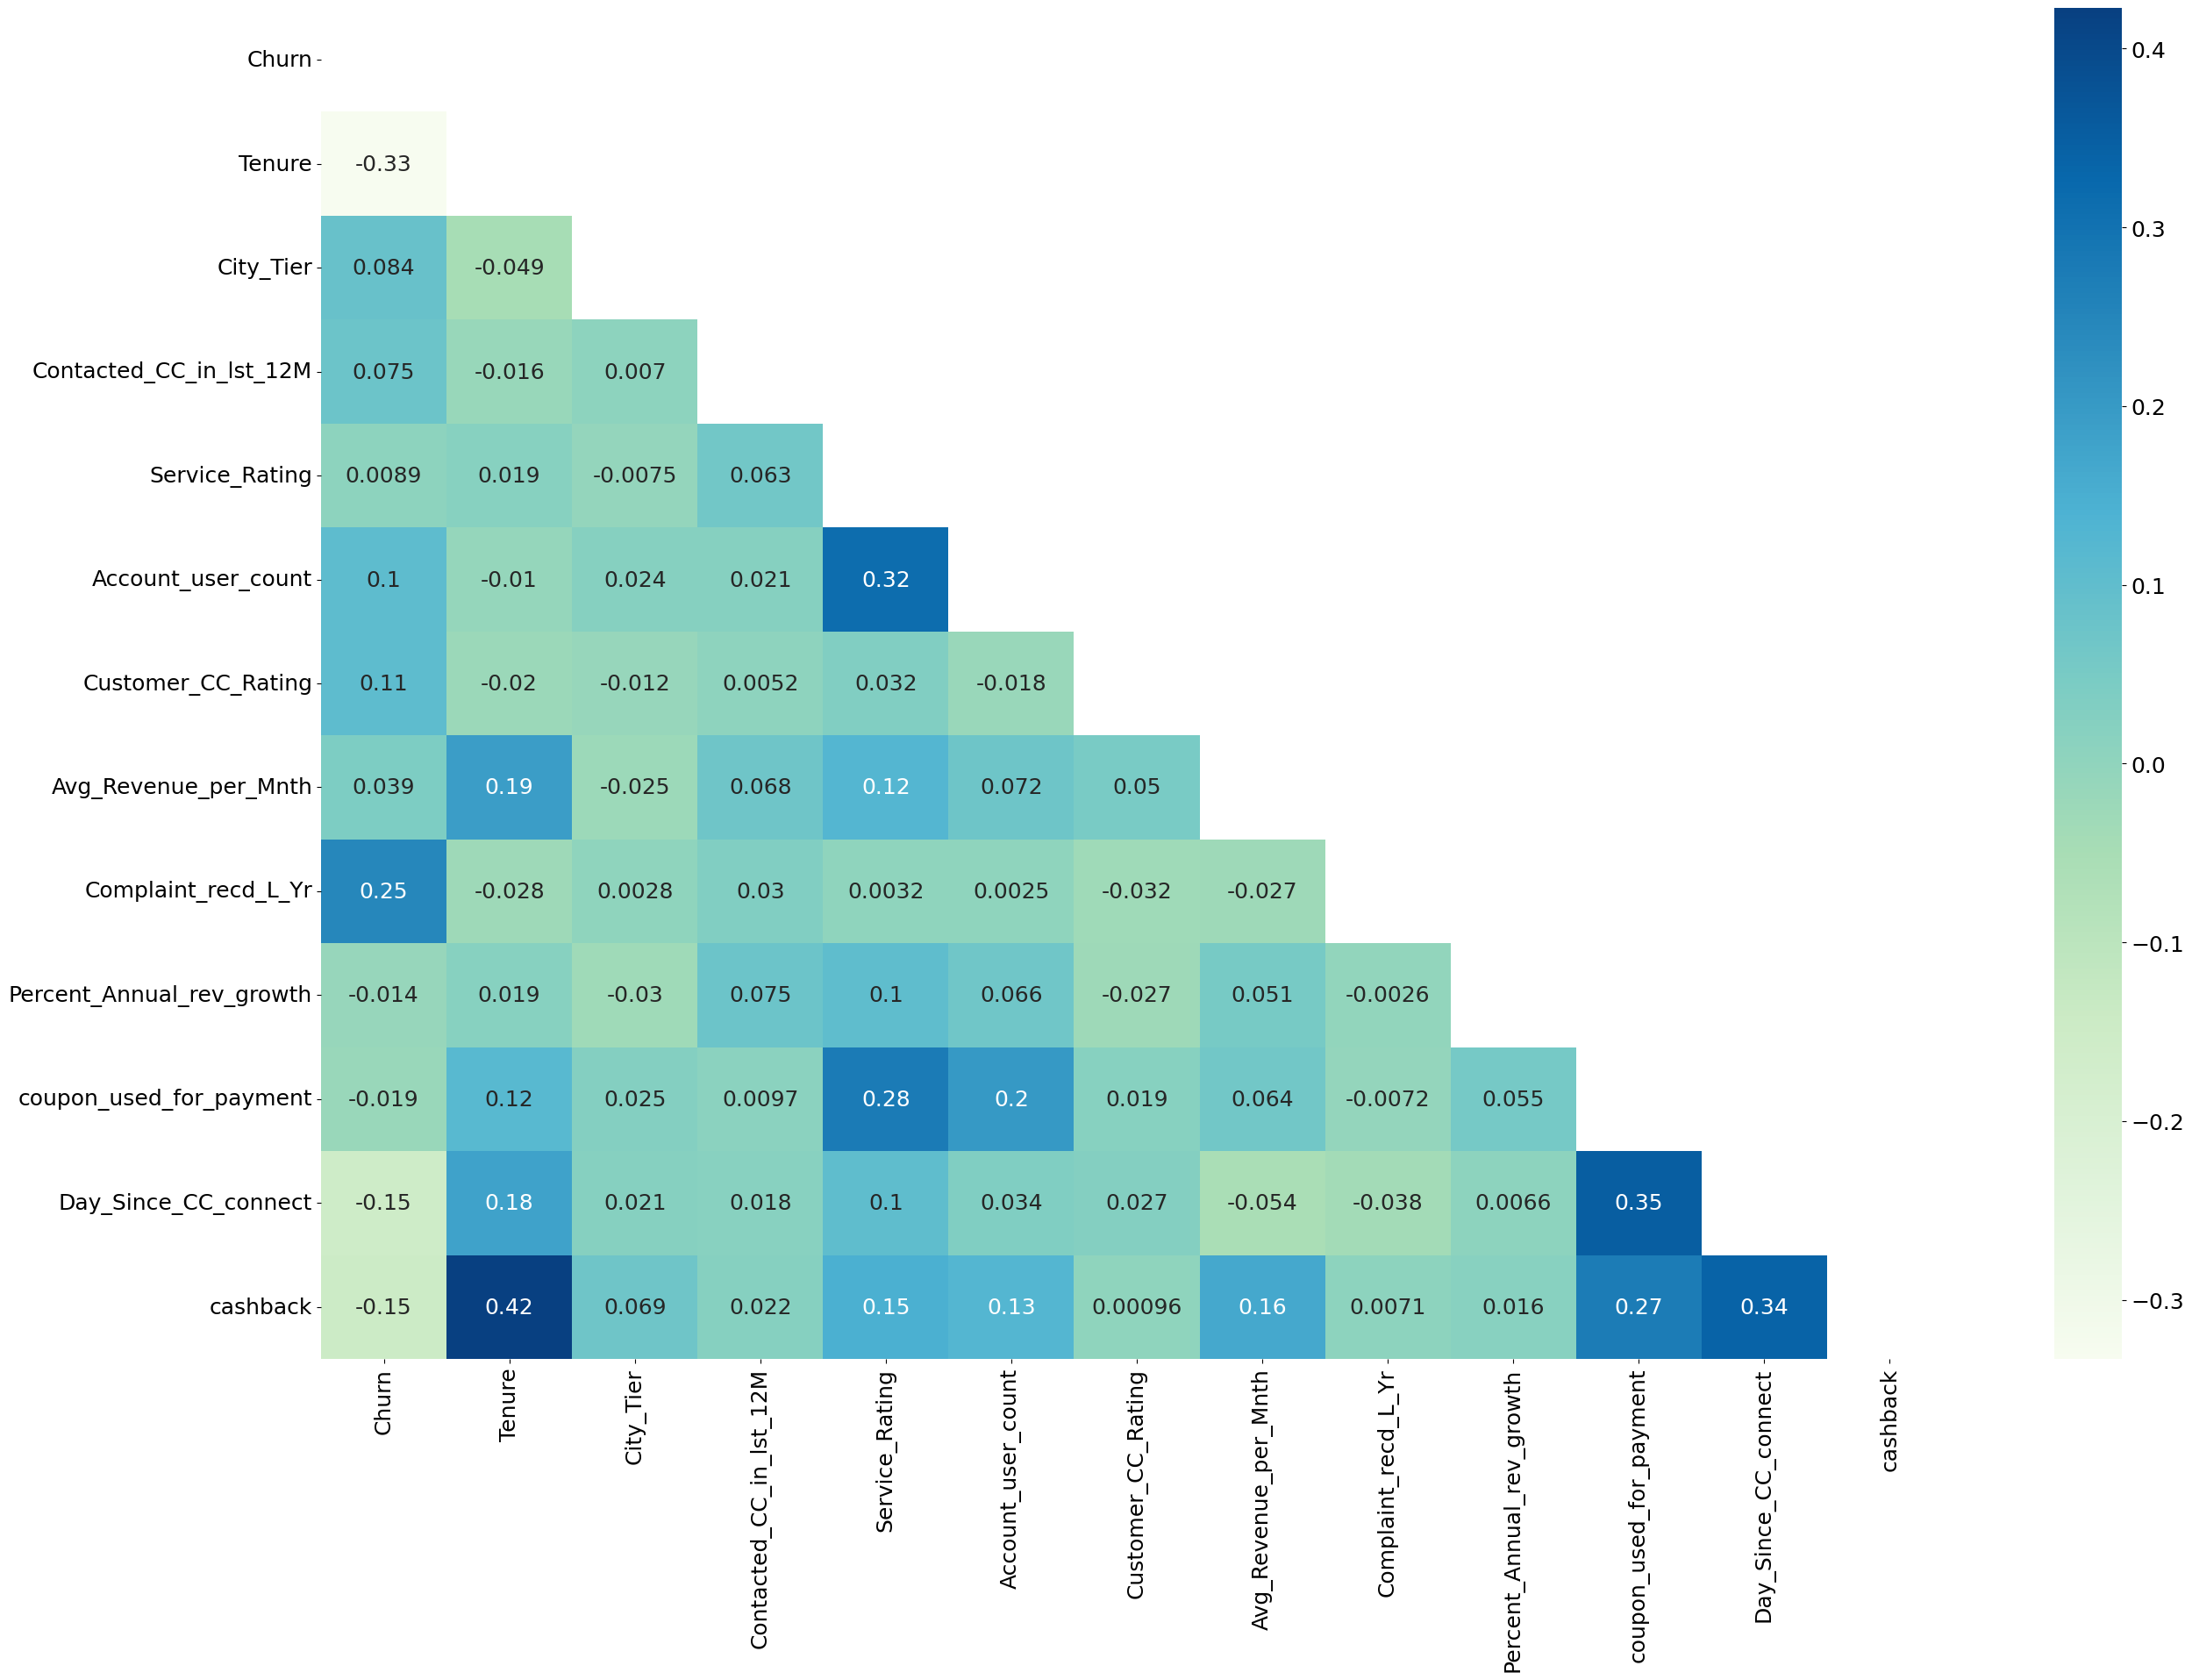

In [30]:
msk=np.zeros_like(df.corr())                                  #create a 2d arrays of zeros for each feature in dataframe
msk[np.triu_indices_from(msk)] = True                         #split the array diagonally so that we have two part of zeros and ones
fig, ax = plt.subplots( figsize=(30, 20))                     #defining the subplot
#sns.heatmap(df.corr(method='spearman'), mask=msk,  cmap='GnBu', annot=True)    #ploting heatmap
sns.heatmap(df.corr(method='pearson'), mask=msk,  cmap='GnBu', annot=True)    #ploting heatmap
plt.show()

# triu_indices_from: reference <https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html>
# zeros_like: https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html

# The above correlation Plot established:

Positive Correlation between:

Churn - Complain_ly (0.25)

Tenure - Cashback (0.42)

Servic_Score - Account_User_count (0.32)

Coupon_Used_for_payment - Day_Since_CC_connect (0.35)

Day_Since_CC_Connect - (0.34)

Negative Correlation between:

Churn - Tenure (-0.33)

Churn - Day_Since_CC_Connect (-0.15)

Churn - Cashback (-0.15)

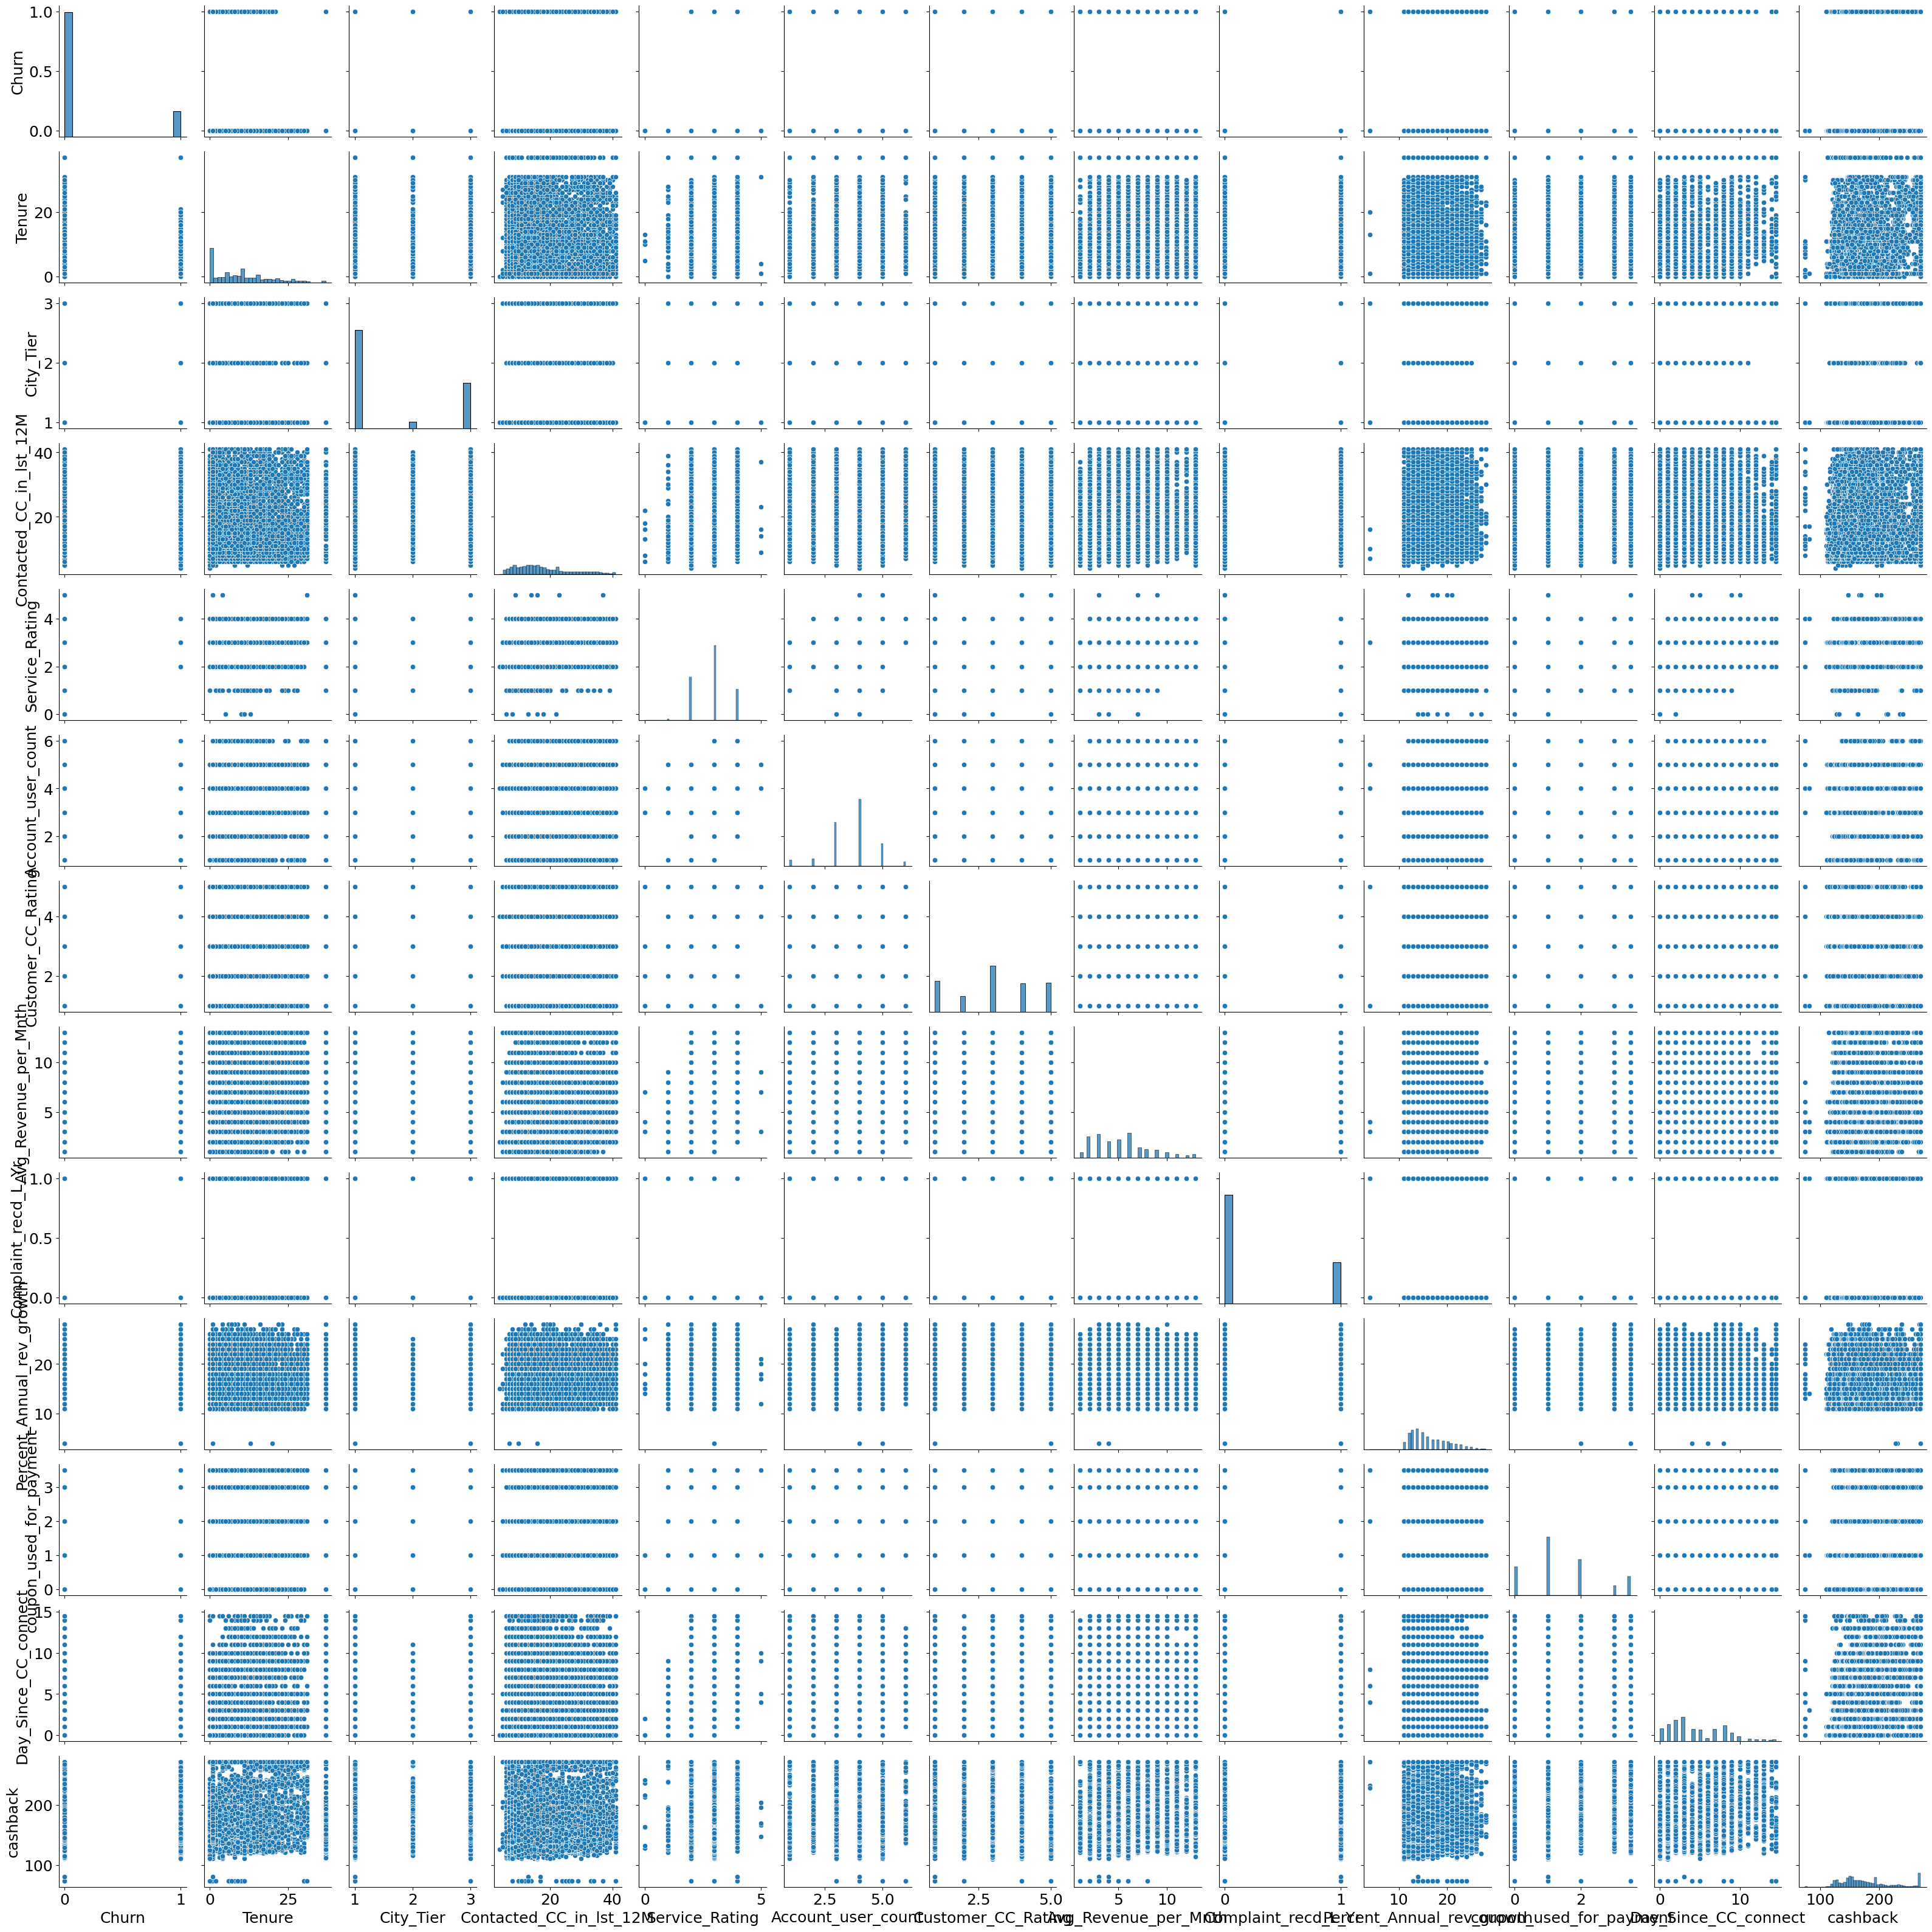

In [31]:
sns.pairplot(df)
plt.show()